<a href="https://colab.research.google.com/github/Quincy2105/Covid-19-data-analysis/blob/main/Covid_19_Data_Analysis_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1000 non-null   datetime64[ns]
 1   Country    1000 non-null   object        
 2   Confirmed  1000 non-null   int64         
 3   Deaths     1000 non-null   int64         
 4   Recovered  1000 non-null   int64         
 5   Active     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 47.0+ KB


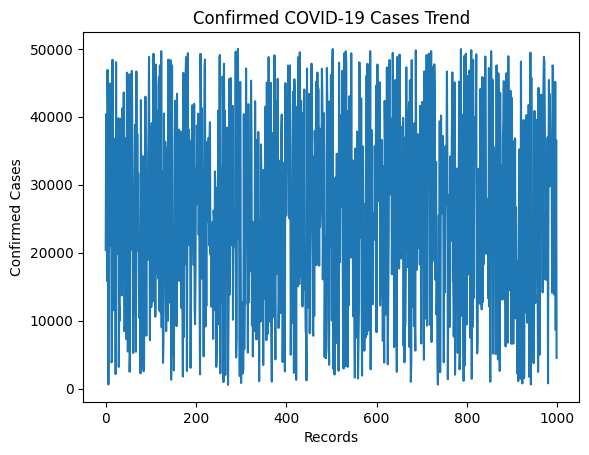

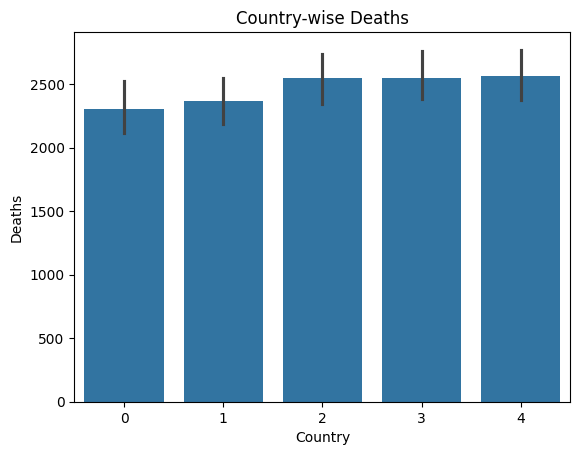

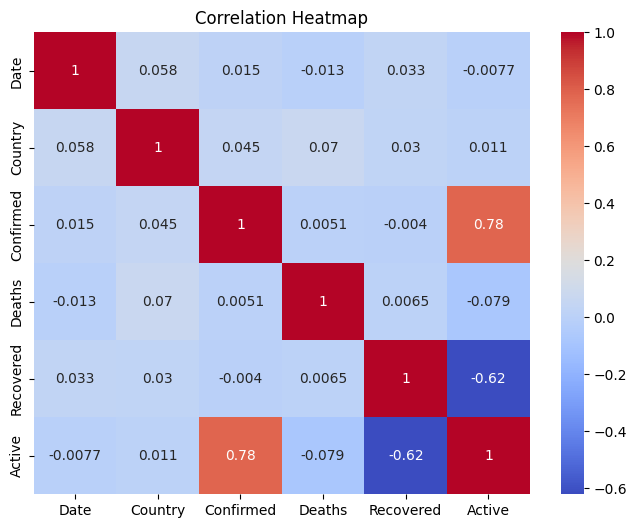

Mean Absolute Error (MAE): 12549.694757044166
Mean Squared Error (MSE): 210043765.1652623
R2 Score: -0.0002853473020123509


,Date,Country,Confirmed,Deaths,Recovered,Active
0,2020-01-01,0,20415,704,12705,7006
1,2020-01-02,3,40415,575,31437,8403
2,2020-01-03,2,37719,3233,5582,28904
3,2020-01-04,3,15843,4784,27105,-16046
4,2020-01-05,3,46903,2633,22860,21410
...,...,...,...,...,...,...
995,2022-09-22,4,27484,4698,18585,4201
996,2022-09-23,1,45133,341,13077,31715
997,2022-09-24,1,8625,3829,19974,-15178
998,2022-09-25,0,36559,1969,7774,26816


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# Dataset Creation (1000 Records)
# -----------------------------
np.random.seed(42)

data = {
    "Date": pd.date_range(start="2020-01-01", periods=1000),
    "Country": np.random.choice(["India", "USA", "Italy", "Brazil", "UK"], 1000),
    "Confirmed": np.random.randint(500, 50000, 1000),
    "Deaths": np.random.randint(1, 5000, 1000),
    "Recovered": np.random.randint(100, 40000, 1000)
}

df = pd.DataFrame(data)

# Create Active cases column
df["Active"] = df["Confirmed"] - (df["Deaths"] + df["Recovered"])

# Display sample dataset
df.head()

# Dataset information
df.info()

# -----------------------------
# Remove duplicate records
# -----------------------------
df.drop_duplicates(inplace=True)

# -----------------------------
# Encode Country column
# -----------------------------
le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])

# -----------------------------
# Exploratory Data Analysis (EDA)
# -----------------------------

# Confirmed cases trend
plt.figure()
plt.plot(df["Confirmed"])
plt.title("Confirmed COVID-19 Cases Trend")
plt.xlabel("Records")
plt.ylabel("Confirmed Cases")
plt.show()

# Country-wise deaths
plt.figure()
sns.barplot(x=df["Country"], y=df["Deaths"])
plt.title("Country-wise Deaths")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# Feature Selection
# -----------------------------
X = df[["Deaths", "Recovered"]]
y = df["Confirmed"]

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# Model Building
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# Prediction
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# Model Evaluation
# -----------------------------
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Display full dataset (for screenshot if needed)
display(df)

# -----------------------------
# Interactive Sheet (Colab)
# -----------------------------
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)
